# Advanced Exercise 2

Create a 3D plot of the first three principal components

## Loading packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [2]:
df_1000_genomes = pd.read_csv("matrix_1kg.txt",
                      sep = '\t')
df_1000_genomes

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Subset for pca input 
pca_input = df_1000_genomes.iloc[:, 4:]
pca_input

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Transpose 
pca_input = pca_input.T

In [5]:
# Normalize data
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)

array([ 2.81174983e-16,  8.04062032e-16, -6.15742413e-16, ...,
       -3.13720792e-16, -1.76030043e-15,  8.90923477e-16])

In [6]:
pca_input_standardized.var(axis = 0)

array([1., 1., 1., ..., 1., 1., 1.])

In [7]:
# Do PCA anaylsis for top 10 PCs
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[ -8.33942982, -10.42879556,  -2.51317284, ...,  -0.77431905,
          0.17380624,  -0.10108099],
       [ -8.46123842, -10.32333664,  -5.30540458, ...,  -0.14108357,
          0.08298947,  -0.24836075],
       [ -8.29420011,  -9.02379806,  -2.83707919, ...,   0.07591098,
         -0.20928591,  -0.38186579],
       ...,
       [ -6.33274903,  -3.78076789,   7.00266391, ...,   0.41530509,
          0.30481266,   1.00749113],
       [ -8.61492143,  -2.74356625,   8.75646455, ...,   0.89519933,
         -0.07442444,  -1.01940444],
       [ -6.0796691 ,  -1.78561064,   9.18783069, ...,   0.70829883,
          0.14314781,   0.26630297]])

In [8]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
                            )
# Add sample name as a column
pca_output_df["sample"] = pca_input.index
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample
0,-8.339430,-10.428796,-2.513173,-0.504357,-5.147024,1.353789,-0.276503,-0.774319,0.173806,-0.101081,HG00096
1,-8.461238,-10.323337,-5.305405,-0.400307,-2.797753,0.773176,0.504418,-0.141084,0.082989,-0.248361,HG00097
2,-8.294200,-9.023798,-2.837079,-0.784483,-4.380026,0.913507,0.682709,0.075911,-0.209286,-0.381866,HG00099
3,-7.921072,-9.075307,-5.255315,-0.325317,-2.581848,-0.365553,-0.813710,-0.188738,-0.537334,0.242513,HG00100
4,-8.883854,-10.099684,-5.304067,0.384304,-0.763854,0.262516,-0.041011,0.594015,0.275075,-0.510925,HG00101
...,...,...,...,...,...,...,...,...,...,...,...
2543,-8.045113,-0.478142,8.874026,0.642656,3.073960,-1.280738,-0.035365,-0.867747,0.358915,0.941342,NA21137
2544,-8.438440,-3.946118,11.072783,0.302988,1.806141,0.724522,-0.799175,-0.142249,1.138494,0.575946,NA21141
2545,-6.332749,-3.780768,7.002664,0.886480,1.135083,-0.840709,-0.334595,0.415305,0.304813,1.007491,NA21142
2546,-8.614921,-2.743566,8.756465,-0.023381,1.485924,-0.266987,0.749977,0.895199,-0.074424,-1.019404,NA21143


## Import Metadata

In [9]:
df_metadata = pd.read_csv('integrated_call_samples_v3.20130502.ALL.panel', sep ='\t').iloc[:,0:4]
df_metadata

,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


## Plot

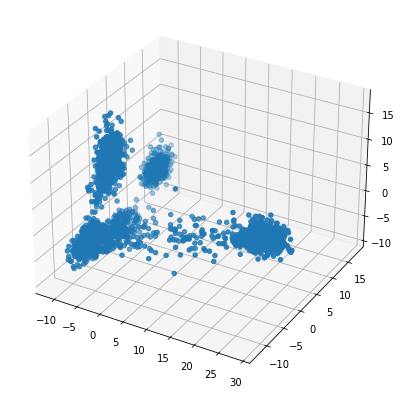

In [10]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = pca_output_df['PC1'], ys = pca_output_df['PC2'], zs = pca_output_df['PC3'])

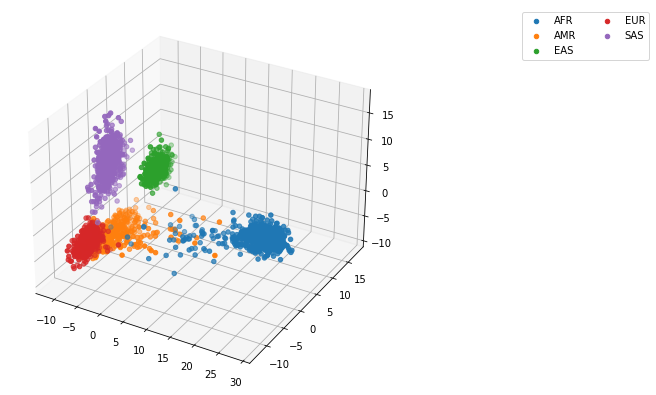

In [18]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')

merged = pd.merge(pca_output_df, df_metadata.iloc[:,0:3], on = 'sample')
merged

superpops = merged.groupby('super_pop')
for name, group in superpops: 
    ax.scatter(xs = group['PC1'], ys = group['PC2'], zs = group['PC3'], label = name)
    
plt.legend(bbox_to_anchor = (1.7,1), loc = 'upper right', ncol = 2)